# Project: Wrangling and Analyze Data

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a lovely comment about the individual dogs. These ratings almost always have a fixed denominator of 10. The numerators, which are always greater than 10, e.g., 11/10, 12/10, 13/10, etc., Why? Because "they're good dogs".

WeRateDogs has over 4 million followers and has received international media coverage.

Its obvious that the average real-world datasets usually don't come clean, I will be using Python and its libraries to analyse the data from the classroom and in a variety of formats, assess its quality and tidiness, and then clean it. This is called data wrangling!




## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Importation of libraries to be used in this project
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading twitter archive csv file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
 #r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
  

In [4]:
#with open('image_predictions.tsv', 'w') as file:
    #file.write(r.text)

In [5]:
#Overview of the url data from the classroom
tweet_image = pd.read_csv('image_predictions.tsv', sep = '\t')
tweet_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#Inspecting statistical values
tweet_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [7]:
#Overview of data types
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
#Loading twitter json file
df_json = pd.read_json('tweet_json.txt', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

### Programmatically accessing Twitter Archive Enhanced file

In [9]:
#Accessing the first five rows
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [10]:
#Accessing the least five rows
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
#Overview of the data set
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_archive['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [13]:
#Inspect for duplicates
sum(df_archive.duplicated())

0

In [14]:
#confirm the data tyoes
df_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
#Checking for unique values
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [16]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Observations



1. tweet_id column is integer instead of string.
2. There are only 78 values in in_reply_to_status_id and in_reply_to_user_id columns.
3. Timestamp column is a string, instead of datetime object.
4. There are 181 non-null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.
5. Expanded_urls columns has 2297 non-null values.
4. Misrepresentation of NA value in different columns.


### Accessing the json file


In [17]:
#Inspecting the first five rows
df_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [18]:
#Checking the data frame and structure
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [19]:
#Checking for duplicate id
df_json.id.duplicated().sum()

0

### Quality issues
1. Tweet id is recorded as float instead of a string (object) 

2. Timestamp should be date time object instead of object

3. Expanded url's has some duplicated and multiple entries

4. Rating denominator fixed at 10 but we have deviations ranging from 0 to 170

5. For the json file, id is saved as integer other than string

6. Missing data on in_reply_to_status_id, in_reply_to_user_id and the retweeted_status_id etc. which are not required.

7. Text has url attached at the end 

8. None values found in different columns such as Doggo, Floofer, Pupper, Puppo etc.

### Tidiness issues
1. Time and date found in the Timestamp column.

2. Unnamed column with so many null values

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_json_clean = df_json.copy()
tweet_image_clean = tweet_image.copy()

### Issue #1:

Tweet id is recorded as float instead of a string (object)

### Tidiness Issue #2:
Timestamp should be date time object instead of object

#### Define

Converting the timestamp to date time in the data frame

#### Code

In [21]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

df_archive_clean.sort_values('timestamp', inplace=True)

df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)

#### Test

In [22]:
df_archive_clean['timestamp']

2355   2015-11-15 22:32:08+00:00
2354   2015-11-15 23:05:30+00:00
2353   2015-11-15 23:21:54+00:00
2352   2015-11-16 00:04:52+00:00
2351   2015-11-16 00:24:50+00:00
                  ...           
4      2017-07-29 16:00:24+00:00
3      2017-07-30 15:58:51+00:00
2      2017-07-31 00:18:03+00:00
1      2017-08-01 00:17:27+00:00
0      2017-08-01 16:23:56+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

### Code

Extracting both date and time from the timestamp object and drop the timestamp column after extraction.



In [23]:
df_archive_clean['date'] = pd.to_datetime(df_archive_clean['timestamp'].dt.date)
df_archive_clean['time'] = df_archive_clean['timestamp'].dt.time

# Removing timestamp from the dataframe
df_archive_clean.drop(columns=['timestamp'], inplace=True)

## Test

In [24]:
df_archive_clean.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56


In [25]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2355 to 0
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   source                      2356 non-null   object        
 4   text                        2356 non-null   object        
 5   retweeted_status_id         181 non-null    float64       
 6   retweeted_status_user_id    181 non-null    float64       
 7   retweeted_status_timestamp  181 non-null    object        
 8   expanded_urls               2297 non-null   object        
 9   rating_numerator            2356 non-null   int64         
 10  rating_denominator          2356 non-null   int64         
 11  name                        2356 non-null   object      

### Issue #3:
Expanded url's has some duplicated and multiple entries

#### Define:
Use the replace function to remove the attached url at the end of the tweet-text

#### Code


In [26]:
df_archive_clean['text'] = df_archive_clean['text'].str.replace(r'\s*http\S*', "", regex=True)

#### Test

In [27]:
df_archive_clean['text'].str.contains('http').sum()

0

In [28]:
sum(df_archive_clean.duplicated())

0

Problem: Misrepresentation of NA values




## Define
Use dataframe.replace() function to replace all the "None" strings in the dog_stages columns


### Code

In [29]:
df_archive_clean.loc[:, "doggo":'puppo'] = df_archive_clean.loc[:, "doggo":'puppo'].replace({'None': np.nan})

### Test

In [30]:
df_archive_clean.loc[:5, "doggo":'puppo']

,doggo,floofer,pupper,puppo
2355,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN
2351,NaN,NaN,NaN,NaN
...,...,...,...,...
9,doggo,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


In [31]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2355 to 0
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   source                      2356 non-null   object        
 4   text                        2356 non-null   object        
 5   retweeted_status_id         181 non-null    float64       
 6   retweeted_status_user_id    181 non-null    float64       
 7   retweeted_status_timestamp  181 non-null    object        
 8   expanded_urls               2297 non-null   object        
 9   rating_numerator            2356 non-null   int64         
 10  rating_denominator          2356 non-null   int64         
 11  name                        2356 non-null   object      

## Problem
Twitter archive: Dog types require just one column


### Define

Use melt method to get all values of dog type in one column and remove all redundant dog stage columns e.g., 'doggo', 'floofer', 'pupper', 'puppo'


In [32]:
dog_type = df_archive_clean.melt(id_vars= ['tweet_id'],
                value_vars=('doggo', 'floofer', 'pupper', 'puppo'),
                    var_name='dogs_col', value_name='dog_type')

dog_type = dog_type[~dog_type['dog_type'].isnull()].drop(columns=['dogs_col'])

# Merge the dog type to the dataframe
df_archive_clean = pd.merge(df_archive_clean, dog_type, on='tweet_id', how='left')

df_archive_clean['dog_type'] = df_archive_clean['dog_type'].astype('category')

# Drop all untidy columns
df_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)


## Test

In [33]:
# All columns in the dataframe
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'date', 'time', 'dog_type'],
      dtype='object')

In [34]:
df_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_type
0,666020888022790149,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,2015-11-15,22:32:08,NaN
1,666029285002620928,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,2015-11-15,23:05:30,NaN


In [35]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2370 non-null   object        
 1   in_reply_to_status_id       79 non-null     float64       
 2   in_reply_to_user_id         79 non-null     float64       
 3   source                      2370 non-null   object        
 4   text                        2370 non-null   object        
 5   retweeted_status_id         183 non-null    float64       
 6   retweeted_status_user_id    183 non-null    float64       
 7   retweeted_status_timestamp  183 non-null    object        
 8   expanded_urls               2311 non-null   object        
 9   rating_numerator            2370 non-null   int64         
 10  rating_denominator          2370 non-null   int64         
 11  name                        2370 non-null   object      

## Problem

Twitter archive: Invalid dogs name

## Define
Remove all dogs name with lower case and replace all "None" with np.nan in the dataframe.

## Code

In [36]:

df_archive_clean = df_archive_clean[~df_archive_clean.name.str.islower()]

df_archive_clean.replace({"None": np.nan}, inplace=True)

## Test

In [37]:
df_archive_clean.name.value_counts()

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Tucker     10
           ..
Covach      1
Geoff       1
Maxwell     1
Oddie       1
Tilly       1
Name: name, Length: 931, dtype: int64

### Issue #4:
Rating denominator fixed at 10 but we have deviations ranging from 0 to 170

#### Define:
Use query() method to extract dataframe with ratings denominator of 10. Evaluate the rating_numerator column by dividing it by 10. Ensure and remove ratings denominator and numerator from the dataframe since we have the total rating.

#### Code

In [38]:
#Ratings denominator > 10 are not valid and should be removed. 
df_archive_clean = df_archive_clean.query('rating_denominator == 10')

#total ratings in percentage
df_archive_clean.rename(columns={"rating_numerator": "total_ratings"}, inplace=True)

#Drop columns with denominator greater than 10
df_archive_clean.drop('rating_denominator', axis = 1, inplace=True)

### Test

In [39]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,total_ratings,name,date,time,dog_type
0,666020888022790149,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,NaN,2015-11-15,22:32:08,NaN
4,666049248165822465,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,NaN,2015-11-16,00:24:50,NaN
11,666071193221509120,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,NaN,2015-11-16,01:52:02,NaN
12,666073100786774016,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,NaN,2015-11-16,01:59:36,NaN
13,666082916733198337,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,NaN,2015-11-16,02:38:37,NaN


In [40]:
df_archive_clean['total_ratings'].tail()

2365    12
2366    13
2367    12
2368    13
2369    13
Name: total_ratings, dtype: int64

## Problem
Twitter archive: Invalid ratings representation

## Define
Extract both ratings numerator and denominator from the text column. Make sure not to extract date as ratings! And use astype() method to change their type from str to float.

## Code

In [41]:
df_archive_clean[['rating_numerator', 'rating_denominator']] = df_archive_clean['text'].str.extract(r'([1-9][0-9]*(?:\.\d+)?)/([1-9][0-9]*)(?!/)', expand=True)
df_archive_clean[['rating_numerator', 'rating_denominator']] = df_archive_clean[['rating_numerator', 'rating_denominator']].astype(float)

## Test

In [42]:
df_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,total_ratings,name,date,time,dog_type,rating_numerator,rating_denominator
0,666020888022790149,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,NaN,2015-11-15,22:32:08,NaN,8.0,10.0
4,666049248165822465,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,NaN,2015-11-16,00:24:50,NaN,5.0,10.0


In [43]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2369
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2239 non-null   object        
 1   in_reply_to_status_id       74 non-null     float64       
 2   in_reply_to_user_id         74 non-null     float64       
 3   source                      2239 non-null   object        
 4   text                        2239 non-null   object        
 5   retweeted_status_id         176 non-null    float64       
 6   retweeted_status_user_id    176 non-null    float64       
 7   retweeted_status_timestamp  176 non-null    object        
 8   expanded_urls               2184 non-null   object        
 9   total_ratings               2239 non-null   int64         
 10  name                        1503 non-null   object        
 11  date                        2239 non-null   datetime64[n

### Issue #6:
Missing data on in_reply_to_status_id, in_reply_to_user_id and the retweeted_status_id etc. which are not required.

#### Define:
Remove all retweeted tweets

#### Code

In [44]:
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]
df_archive_clean = df_archive_clean[df_archive_clean['in_reply_to_user_id'].isnull()]

#### Test

In [45]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 2369
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1989 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   source                      1989 non-null   object        
 4   text                        1989 non-null   object        
 5   retweeted_status_id         0 non-null      float64       
 6   retweeted_status_user_id    0 non-null      float64       
 7   retweeted_status_timestamp  0 non-null      object        
 8   expanded_urls               1986 non-null   object        
 9   total_ratings               1989 non-null   int64         
 10  name                        1391 non-null   object        
 11  date                        1989 non-null   datetime64[n

In [46]:
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [47]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 2369
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1989 non-null   object        
 1   source              1989 non-null   object        
 2   text                1989 non-null   object        
 3   expanded_urls       1986 non-null   object        
 4   total_ratings       1989 non-null   int64         
 5   name                1391 non-null   object        
 6   date                1989 non-null   datetime64[ns]
 7   time                1989 non-null   object        
 8   dog_type            332 non-null    category      
 9   rating_numerator    1988 non-null   float64       
 10  rating_denominator  1988 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 173.1+ KB


In [67]:
df_archive_clean.tail(3)

,tweet_id,source,text,expanded_urls,total_ratings,name,date,time,dog_type,rating_numerator,rating_denominator
2367,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,2017-07-31,00:18:03,NaN,12.0,10.0
2368,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,2017-08-01,00:17:27,NaN,13.0,10.0
2369,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,2017-08-01,16:23:56,NaN,13.0,10.0


### Problem

Image prediction: Erroneous datatype


## Define

Change the datatype of tweet_id column in both image prediction and json to string using astype() method in pandas

In [49]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [50]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [51]:
#Drop unwanted columns
df_json_clean = df_json_clean.loc[:, ["id", "retweet_count", 'favorite_count']]

## Test

In [52]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Code

In [53]:
# Changing of tweet_id and id from interger to float
tweet_image_clean['tweet_id'] = tweet_image_clean['tweet_id'].astype(str)
df_json_clean['id'] = df_json_clean['id'].astype(str)

## Test

In [54]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Merging the three (3) data set together

In [55]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [56]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 2369
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1989 non-null   object        
 1   source              1989 non-null   object        
 2   text                1989 non-null   object        
 3   expanded_urls       1986 non-null   object        
 4   total_ratings       1989 non-null   int64         
 5   name                1391 non-null   object        
 6   date                1989 non-null   datetime64[ns]
 7   time                1989 non-null   object        
 8   dog_type            332 non-null    category      
 9   rating_numerator    1988 non-null   float64       
 10  rating_denominator  1988 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 173.1+ KB


In [57]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Code

In [58]:
# Merging both twitter archive and additional tweet info
df_clean = (pd.merge(df_archive_clean, 
                tweet_image_clean, on = 'tweet_id'))

In [59]:
# Merging twitter archive with tweet image prediction
df_clean = (pd.merge(df_clean, 
                df_json_clean, left_on= 'tweet_id',
                    right_on='id', how='inner')
                        .drop('id', axis=1))

### Test

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 0 to 1867
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1868 non-null   object        
 1   source              1868 non-null   object        
 2   text                1868 non-null   object        
 3   expanded_urls       1868 non-null   object        
 4   total_ratings       1868 non-null   int64         
 5   name                1350 non-null   object        
 6   date                1868 non-null   datetime64[ns]
 7   time                1868 non-null   object        
 8   dog_type            300 non-null    category      
 9   rating_numerator    1867 non-null   float64       
 10  rating_denominator  1867 non-null   float64       
 11  jpg_url             1868 non-null   object        
 12  img_num             1868 non-null   int64         
 13  p1                  1868 non-null   object      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
df_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

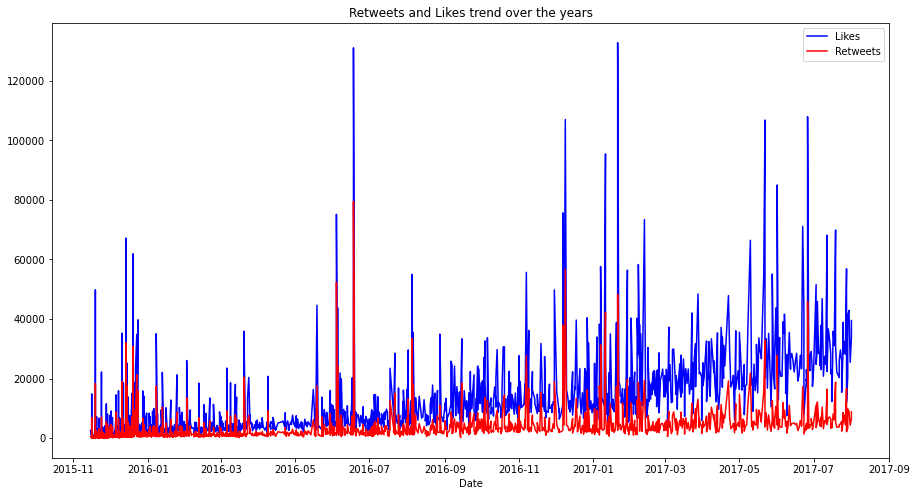

In [62]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_clean['date'], df_clean['favorite_count'], color='b', label='Likes')
ax.plot(df_clean['date'], df_clean['retweet_count'], color='r', label='Retweets')
plt.xlabel('Date')
plt.title('Retweets and Likes trend over the years')
plt.legend();

Observations

As likes go higher, retweets also tend to go high

### Correlation between likes and retweets

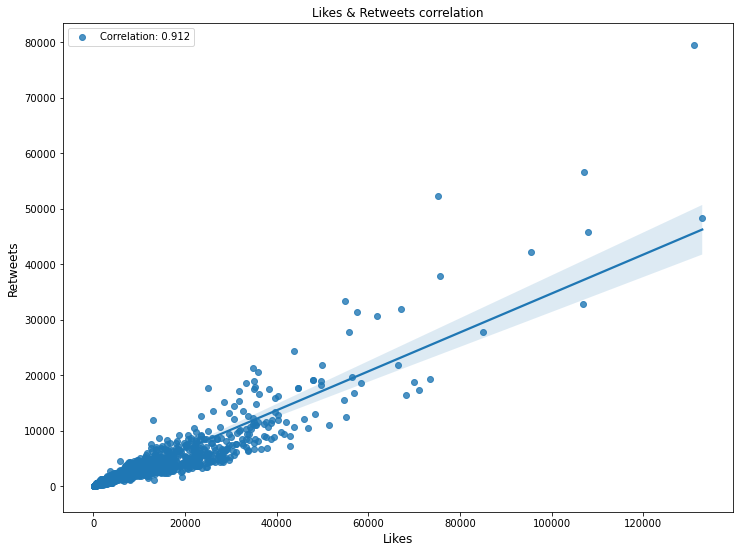

In [63]:
fig, ax = plt.subplots(figsize=(12, 9))
retw_like_cor = df_clean.corr().loc['favorite_count', 'retweet_count'] # Correlation
sns.regplot(x=df_clean['favorite_count'], y=df_clean['retweet_count'], ax=ax)
ax.set_xlabel('Likes', fontsize=12)
ax.set_ylabel('Retweets', fontsize=12)
ax.set_title('Likes & Retweets correlation')
ax.legend([(f"Correlation: {retw_like_cor:.3f}")]);

Observation

There is a linear correlation between retweets and likes

### Top 4 most common dog types

### Visualization

In [64]:
vis_data = df_clean.drop(columns=['time', 'text', 'source'])

In [65]:
# dog breed count with na values
breed_count = (vis_data['dog_type']
                .value_counts()
                    )

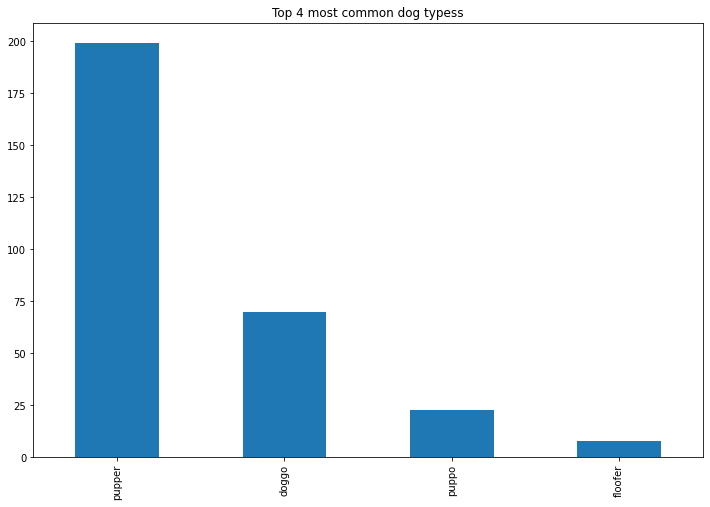

In [66]:
breed_count.head(4).plot.bar(
    figsize=(12, 8), 
    title="Top 4 most common dog typess"
);

Observation

It is obvious that pupper is the highest dog type tweet